In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data_loc = "D:/Timing/YAG Firing/"
fname = "yag_test.h5"

In [49]:
with h5py.File(data_loc+fname, 'r') as f:
    for name in list(f.keys()):
        print(name)

1550884635 20mJ 25Hz 255us QSwitch
1550884660 20mJ 25Hz 255us QSwitch
1550885037 25Hz 112us QSwitch PulseBlaster Generation
1550885307 50Hz 112us QSwitch PulseBlaster Generation
1550885426 50Hz PulseBlaster Flashlamp Internal QSwitch
1550885884 50Hz 112us PulseBlaster triggering all triggers monitored
1550885895 50Hz 112us PulseBlaster triggering all triggers monitored
1550886155 50Hz 112us PulseBlaster Lamp Internal QSwitch CH2 QSwitch output monitor
1550886861 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD
1550886987 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD handheld control
1550887140 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD computer control
1550887891 50Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld control
1550888102 25Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld control


In [36]:
run_name = '/1550884660 20mJ 25Hz 255us QSwitch'

fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    print(dict(grp.attrs))
    print(dict(readout.attrs))
    print(dict(readout['PXIe-5171']['PXIe5171_1'].attrs))
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

{'time_offset': 1550884660.2877626}
{}
{'ch0 : relative_initial_x': 1.4671874999649948e-08, 'ch0 : absolute_initial_x': 119160.02577172, 'ch0 : x_increment': 4.8e-08, 'ch0 : channel': '0', 'ch0 : record': 0, 'ch0 : gain': 8.432298272964545e-05, 'ch0 : offset': 0.002805220428854227, 'ch3 : relative_initial_x': 1.4671874999649948e-08, 'ch3 : absolute_initial_x': 119160.02577172, 'ch3 : x_increment': 4.8e-08, 'ch3 : channel': '3', 'ch3 : record': 0, 'ch3 : gain': 8.509046892868355e-05, 'ch3 : offset': 0.005171805969439447, 'ch5 : relative_initial_x': 1.4671874999649948e-08, 'ch5 : absolute_initial_x': 119160.02577172, 'ch5 : x_increment': 4.8e-08, 'ch5 : channel': '5', 'ch5 : record': 0, 'ch5 : gain': 3.347514575580135e-06, 'ch5 : offset': 0.0010372682474553557}


In [44]:
yag_fire = []
for val in fast_daq.items():
    if val[0] != 'PXIe5171_events':
        ID = int(val[0].split('_')[-1])
        if val[1][:,2].max() > 12000:
            yag_fire.append(ID)
print(len(yag_fire)/len(fast_daq))

0.6743849493487699


In [108]:
import tqdm

ratio = []
with h5py.File(data_loc+fname, 'r') as f:
    for run_name in tqdm.tqdm(list(f.keys())):
        grp = f[run_name]
        readout = grp['readout']
        fast_daq = {}
        yag_fire = []
        for dset in readout['PXIe-5171'].items():
            fast_daq[dset[0]] = dset[1].value
        for val in fast_daq.items():
            if val[0] != 'PXIe5171_events':
                ID = int(val[0].split('_')[-1])
                if val[1][:,-1].max() > 1000:
                    yag_fire.append(ID)
        ratio.append((run_name, len(yag_fire)/(len(fast_daq)-1)))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:15<00:00,  1.20it/s]


In [109]:
ratio

[('1550884635 20mJ 25Hz 255us QSwitch', 1.0),
 ('1550884660 20mJ 25Hz 255us QSwitch', 1.0),
 ('1550885037 25Hz 112us QSwitch PulseBlaster Generation', 0.7114210985178727),
 ('1550885307 50Hz 112us QSwitch PulseBlaster Generation', 0.7145659637076999),
 ('1550885426 50Hz PulseBlaster Flashlamp Internal QSwitch', 1.0),
 ('1550885884 50Hz 112us PulseBlaster triggering all triggers monitored', 0.6),
 ('1550885895 50Hz 112us PulseBlaster triggering all triggers monitored',
  0.6959378733572282),
 ('1550886155 50Hz 112us PulseBlaster Lamp Internal QSwitch CH2 QSwitch output monitor',
  0.6158273381294964),
 ('1550886861 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD',
  0.7173469387755103),
 ('1550886987 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD handheld control',
  1.0),
 ('1550887140 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD computer control',
  0.7541613316261203),
 ('1550887891 50Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld

In [120]:
run_name = '1550886987 50Hz 112us all internal CH2 QSwitch CH3 flashlamp CH5 PD handheld control'
# run_name = '1550888102 25Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld control'

fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    print(dict(grp.attrs))
    print(dict(readout.attrs))
    print(dict(readout['PXIe-5171']['PXIe5171_1'].attrs))
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

{'time_offset': 1550886986.7009695}
{}
{'ch2 : relative_initial_x': 2.6816406250088076e-08, 'ch2 : absolute_initial_x': 121486.55115388801, 'ch2 : x_increment': 4.8e-08, 'ch2 : channel': '2', 'ch2 : record': 0, 'ch2 : gain': 1.676065949141048e-05, 'ch2 : offset': -0.00041613320354372263, 'ch3 : relative_initial_x': 2.6816406250088076e-08, 'ch3 : absolute_initial_x': 121486.55115388801, 'ch3 : x_increment': 4.8e-08, 'ch3 : channel': '3', 'ch3 : record': 0, 'ch3 : gain': 1.6742344087106176e-05, 'ch3 : offset': 0.00023127274471335113, 'ch5 : relative_initial_x': 2.6816406250088076e-08, 'ch5 : absolute_initial_x': 121486.55115388801, 'ch5 : x_increment': 4.8e-08, 'ch5 : channel': '5', 'ch5 : record': 0, 'ch5 : gain': 1.668279401201289e-05, 'ch5 : offset': -0.0013113884488120675}


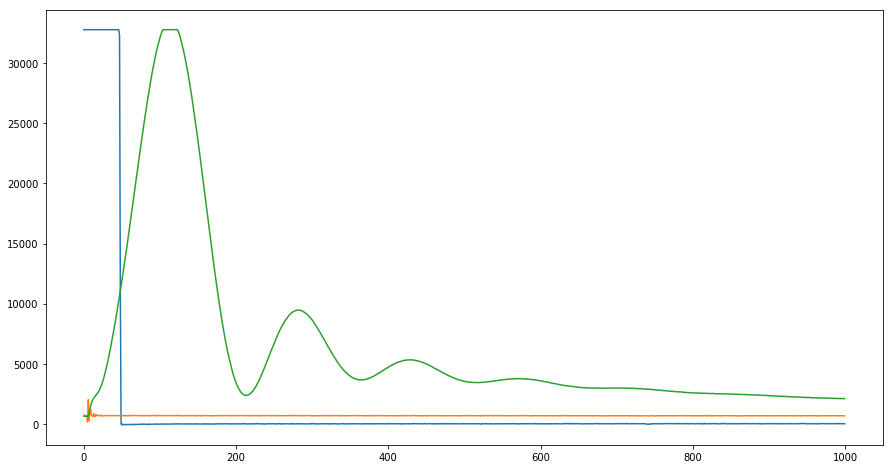

In [130]:
idx = 101

start = 0
stop = 1000

fig, ax = plt.subplots(figsize = (15,8))
dat = fast_daq['PXIe5171_{0}'.format(idx)]
ax.plot(dat[:,0][start:stop])
ax.plot(dat[:,1][start:stop])
ax.plot(dat[:,2][start:stop])

## PulseBlaster clock and PXIe5171 clocks not synchronized
Triggers jitter between one clock cycle

[0.03999989 0.03999989 0.03999989 0.03999994 0.03999994]


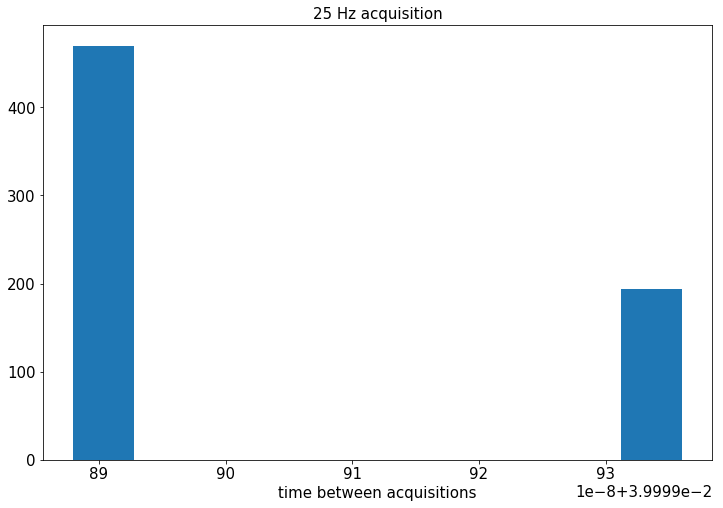

In [173]:
run_name = '1550888102 25Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld control'
time_acquire = []
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    for idx in range(1,len(readout['PXIe-5171'].values())):
        dset = 'PXIe5171_{0}'.format(idx)
        time_acquire.append(readout['PXIe-5171'][dset].attrs['ch5 : absolute_initial_x'])
print(np.unique(np.diff(time_acquire)))

fig, ax = plt.subplots(figsize = (12,8))
ax.hist(np.diff(time_acquire));
ax.set_xlabel('time between acquisitions', fontsize = 15);
ax.set_title('25 Hz acquisition', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)

[0.01999992 0.01999992 0.01999992 0.01999997 0.01999997 0.01999997
 0.01999997]


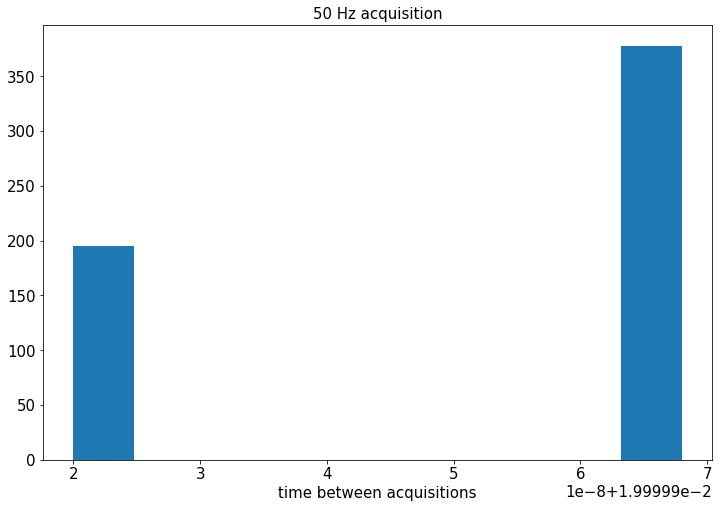

In [174]:
run_name = '1550887891 50Hz 112us PulseBlaster CH0 acq trig CH3 flash trig CH5 pd yag handheld control'
time_acquire = []
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    for idx in range(1,len(readout['PXIe-5171'].values())):
        dset = 'PXIe5171_{0}'.format(idx)
        time_acquire.append(readout['PXIe-5171'][dset].attrs['ch5 : absolute_initial_x'])
print(np.unique(np.diff(time_acquire)))

fig, ax = plt.subplots(figsize = (12,8))
ax.hist(np.diff(time_acquire));
ax.set_xlabel('time between acquisitions', fontsize = 15);
ax.set_title('50 Hz acquisition', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)